In [26]:
import numpy as np
import matplotlib.pyplot as plt
import json
import scipy.io
import os
import pandas as pd

import importlib



In [27]:
dir = 'Lumerical_Results'

df = pd.DataFrame()

for filename in os.listdir(dir):
    filename = os.path.join(dir, filename)
    if not filename.endswith('.json'):
        continue
    if filename.endswith('full-dataset.json') or filename.endswith('mode-overlaps.json'):
        continue

    print(filename)
    with open(filename, 'r') as file:
        data = json.load(file)

    wavelength = data['wavelength']
    bend_radius = data['bend_radius']
    del data['wavelength']
    del data['bend_radius']

    for i in range(1, 7):
        data[str(i)]['wavelength'] = wavelength
        data[str(i)]['bend_radius'] = bend_radius
        data[str(i)]['mode_number'] = i

    df1 = pd.DataFrame(data).transpose()

    df = pd.concat([df, df1])

df.reset_index(inplace=True, drop=True)
df = df.astype({'wavelength': 'int', 'mode_number': 'int'})
# print(df)

Lumerical_Results\TAF_8.3-20-30_dispersion-1000nm_bend-0.0mm.json
Lumerical_Results\TAF_8.3-20-30_dispersion-1000nm_bend-10.0mm.json
Lumerical_Results\TAF_8.3-20-30_dispersion-1000nm_bend-100.0mm.json
Lumerical_Results\TAF_8.3-20-30_dispersion-1000nm_bend-15.0mm.json
Lumerical_Results\TAF_8.3-20-30_dispersion-1000nm_bend-20.0mm.json
Lumerical_Results\TAF_8.3-20-30_dispersion-1000nm_bend-200.0mm.json
Lumerical_Results\TAF_8.3-20-30_dispersion-1000nm_bend-25.0mm.json
Lumerical_Results\TAF_8.3-20-30_dispersion-1000nm_bend-30.0mm.json
Lumerical_Results\TAF_8.3-20-30_dispersion-1000nm_bend-300.0mm.json
Lumerical_Results\TAF_8.3-20-30_dispersion-1000nm_bend-35.0mm.json
Lumerical_Results\TAF_8.3-20-30_dispersion-1000nm_bend-40.0mm.json
Lumerical_Results\TAF_8.3-20-30_dispersion-1000nm_bend-45.0mm.json
Lumerical_Results\TAF_8.3-20-30_dispersion-1000nm_bend-5.0mm.json
Lumerical_Results\TAF_8.3-20-30_dispersion-1000nm_bend-50.0mm.json
Lumerical_Results\TAF_8.3-20-30_dispersion-1000nm_bend-75.0mm

In [28]:
fm_df = df.loc[(df.mode_number <= 2) & (df.loss > 0)].groupby(['wavelength', 'bend_radius']).mean()
fm_df.reset_index(inplace=True)
fm_df.drop(columns='mode_number', inplace=True)
# fm_df

In [29]:
hom_mean_df = df.loc[(df.mode_number > 2)].groupby(['wavelength', 'bend_radius']).mean()
hom_mean_df.reset_index(inplace=True)
hom_mean_df.drop(columns='mode_number', inplace=True)
# hom_mean_df

In [30]:
hom_max_df = df.loc[(df.mode_number > 2)].groupby(['wavelength', 'bend_radius']).max()
hom_max_df.reset_index(inplace=True)
hom_max_df.drop(columns='mode_number', inplace=True)
# hom_max_df

In [31]:
hom_min_df = df.loc[(df.mode_number > 2)].groupby(['wavelength', 'bend_radius']).min()
hom_min_df.reset_index(inplace=True)
hom_min_df.drop(columns='mode_number', inplace=True)
# hom_min_df

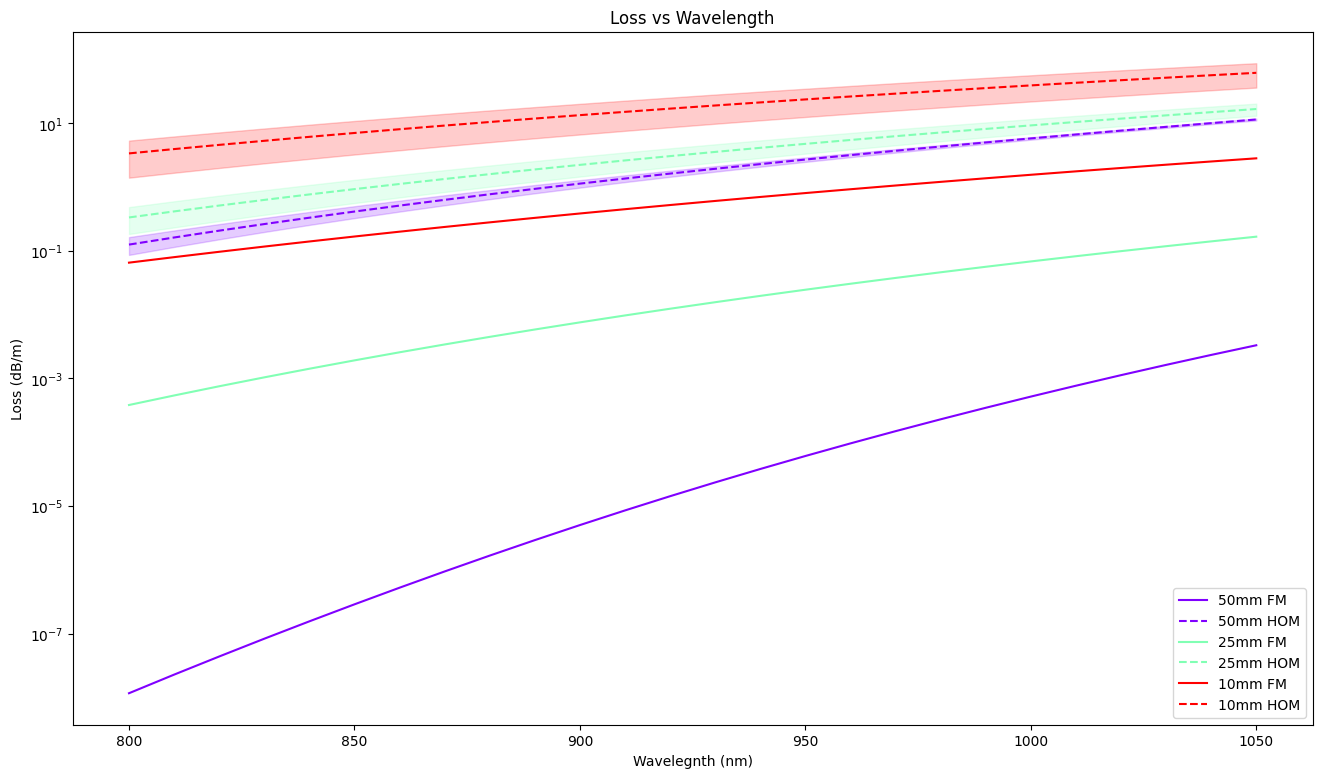

In [32]:
bend_radii = [.05, .025, .01]
color = iter(plt.cm.rainbow(np.linspace(0, 1, len(bend_radii))))

for bend_radius in bend_radii:
    c = next(color)
    plt.plot(
        fm_df.loc[(fm_df.bend_radius == bend_radius), 'wavelength'].values,
        fm_df.loc[(fm_df.bend_radius == bend_radius), 'loss'].values,
        label=f'{int(bend_radius * 1000)}mm FM',
        c=c
    )

    plt.plot(
        hom_mean_df.loc[(hom_mean_df.bend_radius == bend_radius), 'wavelength'].values,
        hom_mean_df.loc[(hom_mean_df.bend_radius == bend_radius), 'loss'].values,
        label=f'{int(bend_radius * 1000)}mm HOM',
        c=c,
        linestyle='dashed'
    )

    plt.fill_between(
        hom_mean_df.loc[(hom_mean_df.bend_radius == bend_radius), 'wavelength'].values,
        hom_max_df.loc[(hom_max_df.bend_radius == bend_radius), 'loss'].values,
        hom_min_df.loc[(hom_min_df.bend_radius == bend_radius), 'loss'].values,
        color=c,
        alpha=0.2,
        # label=f'{int(bend_radius * 1000)}mm HOM Error'
    )

plt.title(f"Loss vs Wavelength")
plt.xlabel("Wavelegnth (nm)")
plt.ylabel("Loss (dB/m)")
plt.yscale('log')
plt.legend()

fig = plt.gcf()
fig.set_size_inches(16, 9)

plt.show()

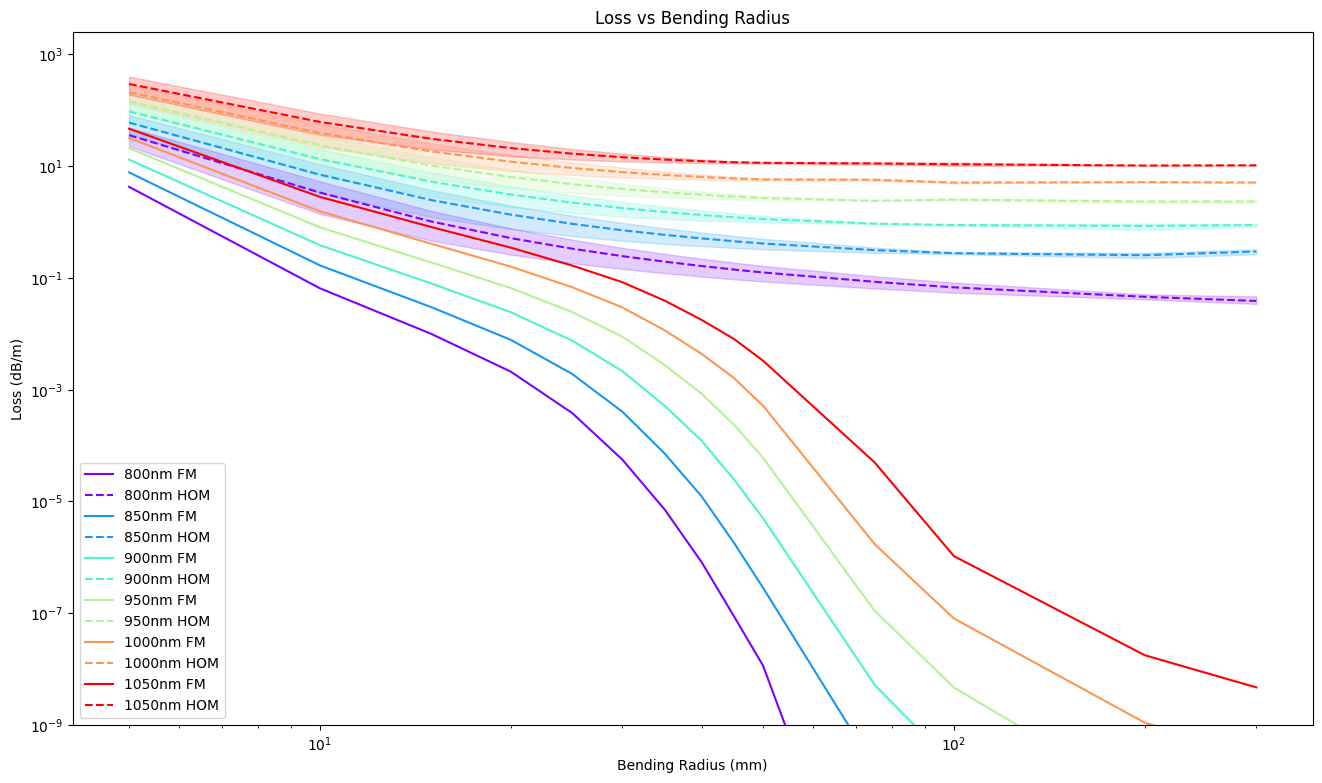

In [33]:
color = iter(plt.cm.rainbow(np.linspace(0, 1, 6)))
for i in range(800, 1060, 50):
    c = next(color)
    plt.plot(
        fm_df.loc[(fm_df.wavelength == i) & (fm_df.bend_radius > 0), 'bend_radius'].values * 1000,
        fm_df.loc[(fm_df.wavelength == i) & (fm_df.bend_radius > 0), 'loss'].values,
        label=f'{i}nm FM',
        c=c
    )

    plt.plot(
        hom_mean_df.loc[(hom_mean_df.wavelength == i) & (hom_mean_df.bend_radius > 0), 'bend_radius'].values * 1000,
        hom_mean_df.loc[(hom_mean_df.wavelength == i) & (hom_mean_df.bend_radius > 0), 'loss'].values,
        label=f'{i}nm HOM',
        c=c,
        linestyle='dashed'
    )

    plt.fill_between(
        hom_mean_df.loc[(hom_mean_df.wavelength == i) & (hom_mean_df.bend_radius > 0), 'bend_radius'].values * 1000,
        hom_max_df.loc[(hom_max_df.wavelength == i) & (hom_max_df.bend_radius > 0), 'loss'].values,
        hom_min_df.loc[(hom_min_df.wavelength == i) & (hom_min_df.bend_radius > 0), 'loss'].values,
        color=c,
        alpha=0.2,
        # label=f'{int(bend_radius * 1000)}mm HOM Error'
    )

plt.title(f"Loss vs Bending Radius")
plt.xlabel("Bending Radius (mm)")
plt.ylabel("Loss (dB/m)")
plt.yscale('log')
plt.xscale('log')
plt.ylim(bottom=1e-9)
plt.legend()

fig = plt.gcf()
fig.set_size_inches(16, 9)

plt.show()

In [34]:
speed_of_light = 299792458

In [35]:
hom_mean_df['signal_speed'] = speed_of_light / hom_mean_df['neff']
hom_mean_df

,wavelength,bend_radius,n,loss,neff,signal_speed
0,800,0.000,1.453317,0.033671,1.453280,2.062868e+08
1,800,0.005,1.453317,35.582704,1.453978,2.061877e+08
2,800,0.010,1.453317,3.352733,1.453447,2.062632e+08
3,800,0.015,1.453317,1.015585,1.453350,2.062768e+08
4,800,0.020,1.453317,0.513622,1.453319,2.062813e+08
...,...,...,...,...,...,...
385,1050,0.050,1.449800,11.396938,1.449156,2.068738e+08
386,1050,0.075,1.449800,11.112236,1.449152,2.068744e+08
387,1050,0.100,1.449800,10.750703,1.449150,2.068746e+08
388,1050,0.200,1.449800,10.209611,1.449149,2.068749e+08


In [36]:
fm_df['signal_speed'] = speed_of_light / fm_df['neff']
fm_df

,wavelength,bend_radius,n,loss,neff,signal_speed
0,800,0.000,1.453317,3.285577e-12,1.454415,2.061258e+08
1,800,0.005,1.453317,4.239948e+00,1.454826,2.060676e+08
2,800,0.010,1.453317,6.500129e-02,1.454507,2.061127e+08
3,800,0.015,1.453317,9.892395e-03,1.454456,2.061200e+08
4,800,0.020,1.453317,2.101563e-03,1.454438,2.061226e+08
...,...,...,...,...,...,...
368,1050,0.050,1.449800,3.296592e-03,1.450544,2.066759e+08
369,1050,0.075,1.449800,4.988048e-05,1.450542,2.066762e+08
370,1050,0.100,1.449800,1.054959e-06,1.450540,2.066764e+08
371,1050,0.200,1.449800,1.780815e-08,1.450540,2.066765e+08


In [37]:
hom_mean_df['dispersion'] = (1 / hom_mean_df['signal_speed']) - (1 / fm_df['signal_speed'])
hom_mean_df

,wavelength,bend_radius,n,loss,neff,signal_speed,dispersion
0,800,0.000,1.453317,0.033671,1.453280,2.062868e+08,-3.787983e-12
1,800,0.005,1.453317,35.582704,1.453978,2.061877e+08,-2.827349e-12
2,800,0.010,1.453317,3.352733,1.453447,2.062632e+08,-3.538958e-12
3,800,0.015,1.453317,1.015585,1.453350,2.062768e+08,-3.687098e-12
4,800,0.020,1.453317,0.513622,1.453319,2.062813e+08,-3.733770e-12
...,...,...,...,...,...,...,...
385,1050,0.050,1.449800,11.396938,1.449156,2.068738e+08,NaN
386,1050,0.075,1.449800,11.112236,1.449152,2.068744e+08,NaN
387,1050,0.100,1.449800,10.750703,1.449150,2.068746e+08,NaN
388,1050,0.200,1.449800,10.209611,1.449149,2.068749e+08,NaN


800
810
820
830
840
850


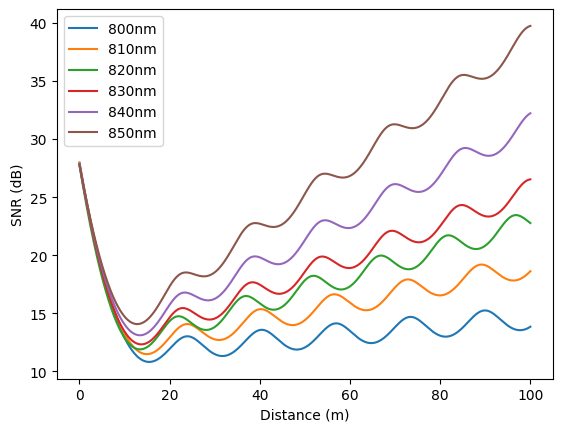

In [42]:
import Dispersion_Model

importlib.reload(Dispersion_Model)

wavelength = 850

fm_power_850 = -0.4994730537
hom_power_850 = -10.85289436

for wavelength in range(800, 860, 10):
    print(wavelength)
    dispersion = \
        hom_mean_df.loc[(hom_mean_df.wavelength == wavelength) & (hom_mean_df.bend_radius == 0), 'dispersion'].values[0]
    hom_attenuation = - \
        hom_mean_df.loc[(hom_mean_df.wavelength == wavelength) & (hom_mean_df.bend_radius == 0), 'loss'].values[0]

    distances, SNRs = Dispersion_Model.SNR_vs_distance(
        fm_power=fm_power_850,
        hom_power=hom_power_850,
        fm_attenuation=0,
        hom_attenuation=hom_attenuation,
        dispersion=dispersion,
        plot_SNR_vs_distacne=False
    )

    plt.plot(distances, SNRs, label=f'{wavelength}nm')
# plt.title(f"Worst case SNR is {SNR_worst:.2f} dB at {d_worst:.1f} m")
plt.xlabel("Distance (m)")
plt.ylabel("SNR (dB)")
plt.legend()
plt.show()


In [39]:
# bend_radii = [0, .1, .05, .025, .01]
# new = fm_df.loc[((fm_df.wavelength >= 1000) & (fm_df.bend_radius == 0)), ['wavelength']]
# new.rename(columns={"loss": "0"}, inplace=True)
# new.set_index('wavelength', inplace=True)
#
# for radius in bend_radii:
#     bend = fm_df.loc[((fm_df.wavelength >= 1000) & (fm_df.bend_radius == radius)), ['wavelength', 'loss']]
#     bend.rename(columns={"loss": f"{radius:.3f}"}, inplace=True)
#     bend.set_index('wavelength', inplace=True)
#     new = new.join(bend)
#
# new

In [57]:
dir = 'Lumerical_Results'

mode_overlaps = {}

for filename in os.listdir(dir):
    filename = os.path.join(dir, filename)
    if not filename.endswith('.json'):
        continue
    if filename.endswith('full-dataset.json') or filename.endswith('mode-overlaps.json'):
        continue


    with open(filename, 'r') as file:
        data = json.load(file)
    mode_overlaps['800'] = pd.DataFrame(
        data['mode_coupling'],
        columns=['mode_1', 'mode_2', 'x_offset', 'coupling']
    )

    fm = mode_overlaps['800'].loc[
        (mode_overlaps['800'].mode_1 == 1) & (
                (mode_overlaps['800'].mode_2 == 1) | (mode_overlaps['800'].mode_2 == 2))].groupby(['x_offset']).sum()
    fm.drop(columns=['mode_1', 'mode_2'], inplace=True)
    fm.rename(columns={'coupling': 'FM'}, inplace=True)

    hom = mode_overlaps['800'].loc[
        (mode_overlaps['800'].mode_1 == 1) & (mode_overlaps['800'].mode_2 > 2)].groupby(['x_offset']).sum()
    hom.drop(columns=['mode_1', 'mode_2'], inplace=True)
    hom.rename(columns={'coupling': 'HOM'}, inplace=True)

    mode_overlaps['800_sum'] = fm.join(hom)
    mode_overlaps['800_sum']

,FM,HOM
x_offset,,
0.000000e+00,1.000000,1.702074e-27
1.000000e-07,0.997388,4.982181e-04
2.000000e-07,0.994780,1.992872e-03
3.000000e-07,0.992174,4.483963e-03
4.000000e-07,0.989573,7.971490e-03
...,...,...
9.600000e-06,0.011722,6.592950e-02
9.700000e-06,0.010780,6.197438e-02
9.800000e-06,0.009878,5.814159e-02


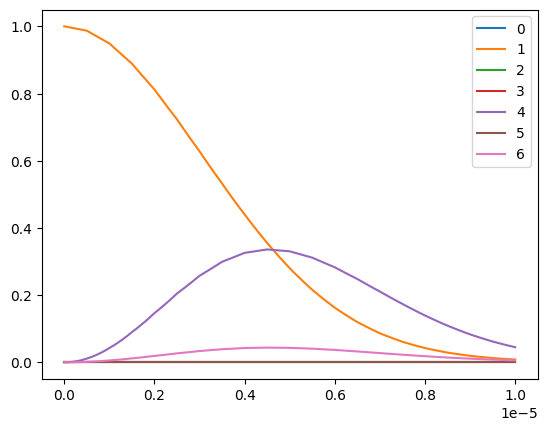

In [41]:
for i in range(7):
    plt.plot(
        mode_overlaps['800'].loc[
            (mode_overlaps['800'].mode_1 == 1) & (mode_overlaps['800'].mode_2 == i), 'x_offset'].values,
        mode_overlaps['800'].loc[
            (mode_overlaps['800'].mode_1 == 1) & (mode_overlaps['800'].mode_2 == i), 'coupling'].values,
        label=f'{i}'
    )

plt.legend()
plt.show()

In [59]:
mode_overlaps['800_sum'].loc[0.3e-7] = np.nan
mode_overlaps['800_sum']

,FM,HOM
x_offset,,
0.000000e+00,1.000000,1.702074e-27
1.000000e-07,0.997388,4.982181e-04
2.000000e-07,0.994780,1.992872e-03
3.000000e-07,0.992174,4.483963e-03
4.000000e-07,0.989573,7.971490e-03
...,...,...
9.800000e-06,0.009878,5.814159e-02
9.900000e-06,0.009016,5.443114e-02
1.000000e-05,0.008192,5.084301e-02


In [60]:
mode_overlaps['800_sum'].sort_index(inplace=True)
mode_overlaps['800_sum']

,FM,HOM
x_offset,,
0.000000e+00,1.000000,1.702074e-27
3.000000e-08,NaN,NaN
5.000000e-08,NaN,NaN
1.000000e-07,0.997388,4.982181e-04
2.000000e-07,0.994780,1.992872e-03
...,...,...
9.600000e-06,0.011722,6.592950e-02
9.700000e-06,0.010780,6.197438e-02
9.800000e-06,0.009878,5.814159e-02


In [61]:
mode_overlaps['800_sum'].interpolate(method = 'slinear',inplace=True)
mode_overlaps['800_sum']

,FM,HOM
x_offset,,
0.000000e+00,1.000000,1.702074e-27
3.000000e-08,0.999216,1.494654e-04
5.000000e-08,0.998694,2.491090e-04
1.000000e-07,0.997388,4.982181e-04
2.000000e-07,0.994780,1.992872e-03
...,...,...
9.600000e-06,0.011722,6.592950e-02
9.700000e-06,0.010780,6.197438e-02
9.800000e-06,0.009878,5.814159e-02
